# Tidal Power Performance Analysis

The following example demonstrates a simple workflow for using Acoustic Doppler Current Profiler (ADCP) data to conduct the power performance analysis of a turbine, given turbine specifications and power data.

Data needed to 
  1. Review the raw data
      - Check timestamps
      - Calculate/check that the depth bin locations are correct
      - Look at velocity, beam amplitude and/or beam correlation data quality
  2. Remove data located above the water surface or below the seafloor
  3. Check for spurious datapoints and remove if necessary
  4. If not already done within the instrument, average the data into time bins of a set time length (normally 5 to 10 min)
  5. Conduct further analysis as required

Start by importing the necessary tools:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mhkit.tidal import resource, graphics, performance
from mhkit.dolfyn import load

In [2]:
# Open processed ADCP dataset
ds_avg = load('data/tidal/adcp.enu.b1.20200815.nc')
ds = load('data/tidal/adcp.principal.a1.20200815.nc')

In [3]:
# Emulate power data
power = ds_avg['U_mag'][10]**3 * 1e5

## IEC/TS 62600-200
#### 9.3 Power-weighted, Hub-Averaged Velocity at Capture Area


In [4]:
df93 = performance.power_curve(
    power,
    velocity=ds['vel'].sel(dir='streamwise'),
    hub_height=4.2,
    doppler_cell_size=0.5, 
    sampling_frequency=1, 
    window_avg_time=600,
    turbine_profile='circular',
    diameter=3,
    height=None,
    width=None)
df93

,U_avg,U_avg_power_weighted,P_avg,P_std,P_max,P_min
U_bins,,,,,,
"(0.0, 0.1]",NaN,NaN,NaN,NaN,NaN,NaN
"(0.1, 0.2]",0.141227,0.071553,744.918374,82.331431,827.249805,662.586943
"(0.2, 0.3]",0.249552,0.225655,1630.931362,455.389098,2089.955578,1010.214163
"(0.3, 0.4]",0.335432,0.318133,5638.950170,1914.037034,9525.038710,2867.085842
"(0.4, 0.5]",0.438040,0.427434,12447.685500,3229.340410,18248.694328,6818.684652
"(0.5, 0.6]",0.553858,0.536892,23992.197212,3985.614418,27668.791479,17477.236425
"(0.6, 0.7]",0.673971,0.656236,41248.736020,3595.169612,47266.210453,38016.216918
"(0.7, 0.8]",0.740717,0.716855,48012.725566,8516.827680,59190.808100,31349.947390
"(0.8, 0.9]",0.851171,0.831442,75117.854531,13145.690322,100170.494582,54670.130351


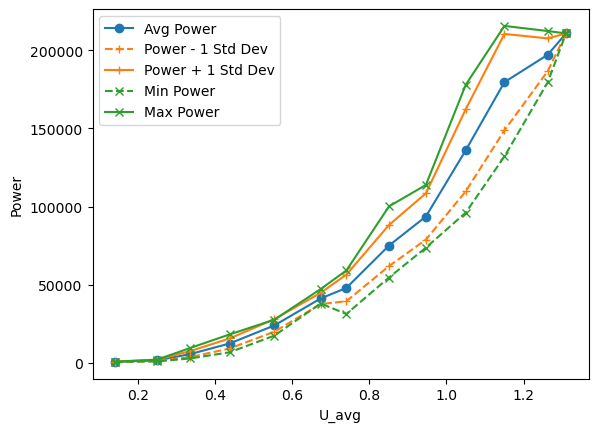

In [41]:
plt.plot(df93['U_avg'], df93['P_avg'], '-o', color='C0', label='Avg Power')
plt.plot(df93['U_avg'], (df93['P_avg'] - df93['P_std']), '--+', color='C1', label='Power - 1 Std Dev')
plt.plot(df93['U_avg'], (df93['P_avg'] + df93['P_std']), '-+', color='C1', label='Power + 1 Std Dev')
plt.plot(df93['U_avg'], df93['P_min'], '--x', color='C2', label='Min Power')
plt.plot(df93['U_avg'], df93['P_max'], '-x', color='C2', label='Max Power')
plt.xlabel('U_avg')
plt.ylabel('Power')
plt.legend()

### 9.4 Velocity Profiles


In [6]:
df94 = performance.mean_velocity_profiles(
    velocity=ds['vel'].sel(dir='streamwise'), 
    hub_height=4.2,
    sampling_frequency=1, 
    window_avg_time=600)
df94


speed_bins,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]"
range,,,
1.2,0.327830,0.693267,1.009486
1.7,0.343948,0.726509,1.091997
2.2,0.351023,0.747787,1.140349
2.7,0.356308,0.764070,1.168349
3.2,0.363989,0.779232,1.182591
3.7,0.372149,0.791213,1.187510
4.2,0.380944,0.799427,1.186296
4.7,0.390321,0.802066,1.181452
5.2,0.399234,0.798254,1.172402


### 9.5 RMS Tidal Velocity

Assumptions:
1. Velocity is binned by the raw velocity at hub-height

In [7]:
df95a = performance.rms_velocity_profiles(
    velocity=ds['vel'].sel(dir='streamwise'), 
    hub_height=4.2,
    sampling_frequency=1,
    window_avg_time=600)
df95a

speed_bins,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]"
range,,,
1.2,0.332935,0.699368,1.017621
1.7,0.348967,0.732764,1.100175
2.2,0.355852,0.754178,1.148619
2.7,0.361312,0.770263,1.176181
3.2,0.368950,0.785446,1.190247
3.7,0.377296,0.797116,1.195043
4.2,0.386196,0.805096,1.193583
4.7,0.395886,0.807466,1.188308
5.2,0.404770,0.803507,1.178877


In [8]:
df95b = performance.std_velocity_profiles(
    velocity=ds['vel'].sel(dir='streamwise'), 
    hub_height=4.2, 
    sampling_frequency=1, 
    window_avg_time=600)
df95b

speed_bins,"(0.0, 0.5]","(0.5, 1.0]","(1.0, 1.5]"
range,,,
1.2,0.056356,0.086718,0.127351
1.7,0.055721,0.089965,0.132389
2.2,0.055172,0.093815,0.136233
2.7,0.056264,0.094560,0.134503
3.2,0.055429,0.096229,0.134158
3.7,0.056817,0.095057,0.133558
4.2,0.058731,0.093984,0.131417
4.7,0.061146,0.092350,0.127353
5.2,0.060849,0.090968,0.123287


[Text(0.5, 0, 'RMS Water Velocity [m/s]'),
 Text(0, 0.5, 'Altitude [m]'),
 (0.0, 9.0)]

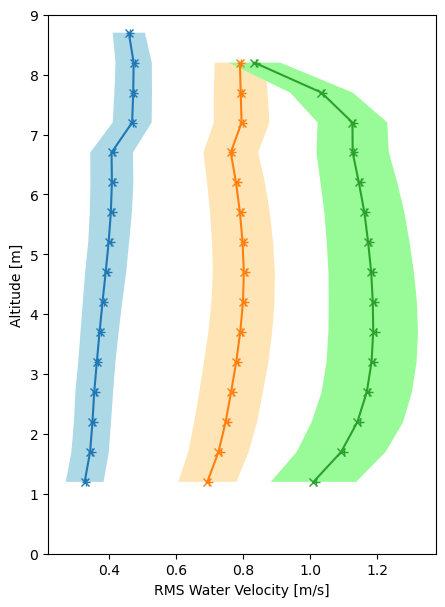

In [38]:
alt = df94.index
mean = df94.values.T
rms = df95a.values.T
std = df95b.values.T

fig, ax = plt.subplots(figsize=(5, 7))
ax.plot(mean[0], alt, '-x', label=df94.columns[0])
ax.plot(mean[1], alt, '-x', label=df94.columns[1])
ax.plot(mean[2], alt, '-x', label=df94.columns[2])
ax.set(xlabel='Mean Water Velocity [m/s]', ylabel='Altitude [m]')

ax.fill_betweenx(alt, mean[0]-std[0], mean[0]+std[0], facecolor='lightblue')
ax.fill_betweenx(alt, mean[1]-std[1], mean[1]+std[1], facecolor='moccasin')
ax.fill_betweenx(alt, mean[2]-std[2], mean[2]+std[2], facecolor='palegreen')

ax.plot(rms[0], alt, '+', color='C0', label=df95a.columns[0])
ax.plot(rms[1], alt, '+', color='C1', label=df95a.columns[1])
ax.plot(rms[2], alt, '+', color='C2', label=df95a.columns[2])
ax.set(xlabel='RMS Water Velocity [m/s]', ylabel='Altitude [m]', ylim=(0,9))




### 9.6 Tidal Ellipses

This is `U_mag` and `U_dir`.

In [10]:
# Need to update with latest dolfyn code
# U2 = ds_avg['U_dir'].values
# U2[U2 < 360] -= 360
# ds_avg['U_dir'].values = U2

U_dir = ds_avg['U_dir'][10].values
U_mag = ds_avg['U_mag'][10].values

# Ebb flows north out of the bay right at 0 degrees, flood flows south at 200 at this location
pr2 = resource.principal_flow_directions(U_dir, 1)
print(pr2)

(201.756591796875, 358.3419952392578)


<PolarAxesSubplot:>

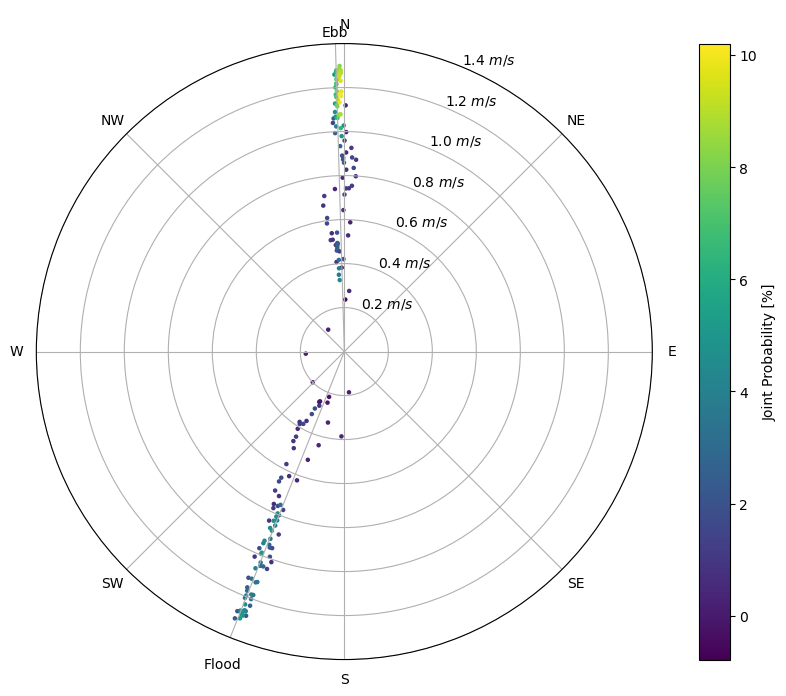

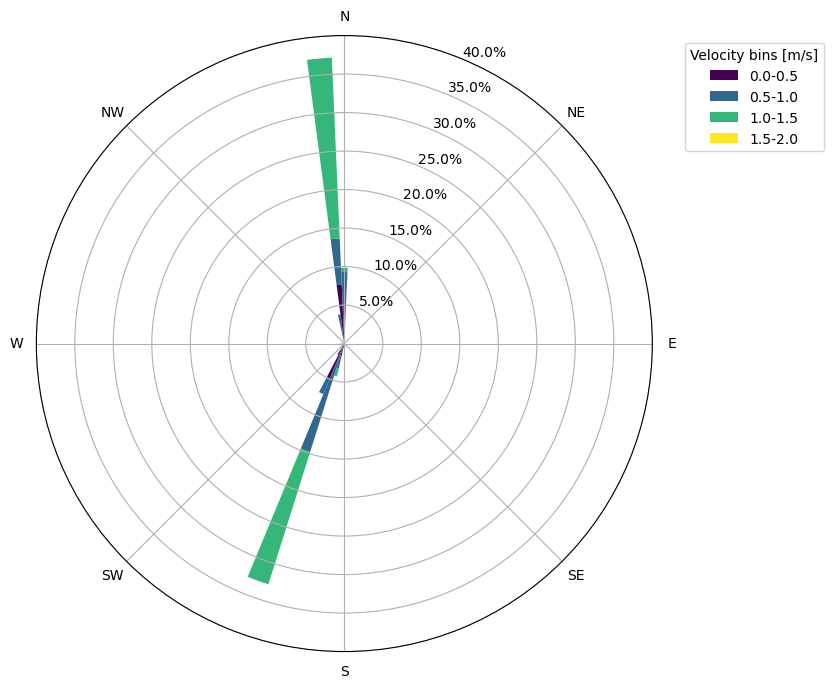

In [11]:
graphics.plot_joint_probability_distribution(
    directions=U_dir, 
    velocities=U_mag,
    width_dir=1,
    width_vel=0.25,
    flood=pr2[0],
    ebb=pr2[1])

graphics.plot_rose(
    directions=U_dir, 
    velocities=U_mag,
    width_dir=5,
    width_vel=0.5)

### 9.7 TEC Efficiency

In [12]:
df97 = performance.device_efficiency(
    power, 
    velocity=ds['vel'].sel(dir='streamwise'),
    water_density=ds['water_density'],
    capture_area=np.pi*1.5**2,
    hub_height=4.2,
    sampling_frequency=1,
    window_avg_time=600)
df97

speed_bins
(0.0, 0.1]          NaN
(0.1, 0.2]    40.441751
(0.2, 0.3]          NaN
(0.3, 0.4]    39.358328
(0.4, 0.5]    41.329002
(0.5, 0.6]    34.968975
(0.6, 0.7]    33.215725
(0.7, 0.8]    24.983322
(0.8, 0.9]    27.408378
(0.9, 1.0]    25.673027
(1.0, 1.1]    26.213540
(1.1, 1.2]    26.696493
(1.2, 1.3]    27.095233
(1.3, 1.4]    25.943451
dtype: float64